**Name:Yuvraj R.Jadhav**
**Roll no:391021**
**Prn:22210320**
**Batch:A1**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.shape

(891, 12)

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data_summary=pd.DataFrame(df.dtypes)
data_summary['Missing_Values']=df.isnull().sum()
data_summary['Nunique']=df.nunique()
data_summary['Count']=df.count()
data_summary=data_summary.rename(columns={0:'Data_Type'})
data_summary

,Data_Type,Missing_Values,Nunique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [16]:
print(df.groupby("Pclass")["Survived"].count())


Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


In [36]:
class TitanicEDA():
    def __init__(self,data_path):
        self.data=self.load_data(data_path)
    def load_data(self,data_path):
        return pd.read_csv(data_path)

    def statistics(self):
        return self.data.describe()

    def statistics2(self):
        print("")
        return self.data.describe(include=['object'])

    def statistics3(self):
        print("")
        data_summary=pd.DataFrame(self.data.dtypes)
        data_summary['Missing_Values']=self.data.isnull().sum()
        data_summary['Nunique']=self.data.nunique()
        data_summary['Count']=self.data.count()
        data_summary=data_summary.rename(columns={0:'Data_Type'})
        data_summary
        return data_summary
      
        
      


    def visualization(self,feature,save_path):
        plt.figure(figsize=(10,6)) 
        group=self.data.groupby(feature)['Survived'].mean()
        group.plot(kind="bar")
        plt.title(f'Survival rate by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Survival Rate')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.savefig(save_path)
        plt.show()
        plt.close()

    def visualization_of_age(self,save_path):
        plt.figure(figsize=(10,6))
        survived=self.data[self.data['Survived']==1]['Age']
        not_survived=self.data[self.data['Survived']==0]['Age']
        plt.hist([survived,not_survived],label=['Survived','Not_Survived'],stacked=True)
        plt.title("Age Distribution by Survival")
        plt.xlabel('Age')
        plt.ylabel('Count')
        plt.legend()
        plt.tight_layout()
        plt.savefig(save_path)
        plt.show()
        plt.close()


    def implement(self):
        print(self.statistics())
        print(self.statistics2())
        print(self.statistics3())
        self.visualization('Pclass','survival_class.png')
        self.visualization('Sex','survival_gender.png')
        self.visualization('Embarked','survival_embarked.png')
        self.visualization('SibSp','survival_sibsp.png')
        self.visualization('Parch','survival_parch.png')
        self.visualization_of_age('Age.png')
     




       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

                           Name   Sex  Ticket    Cabin Embarked
count           

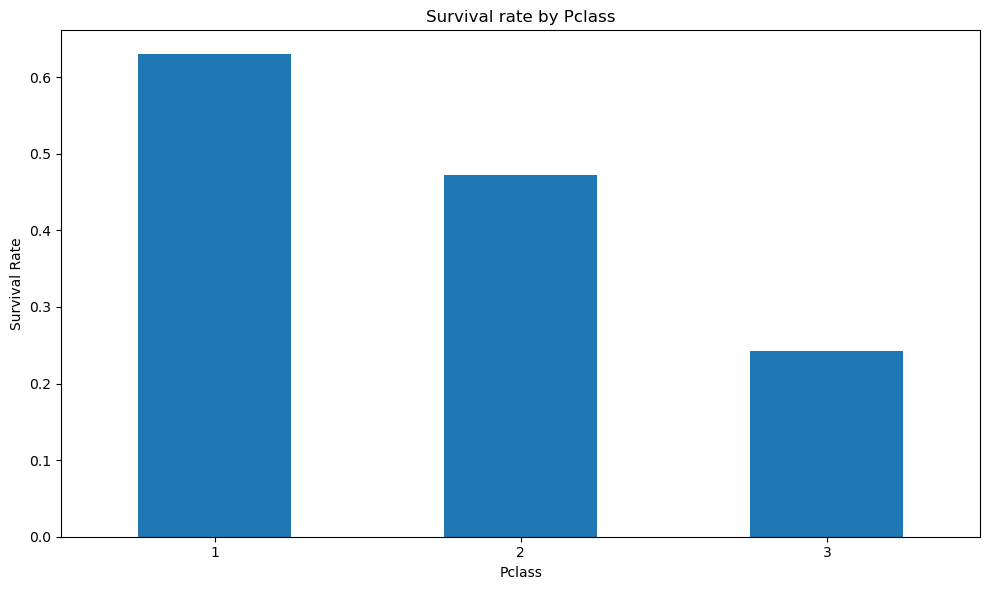

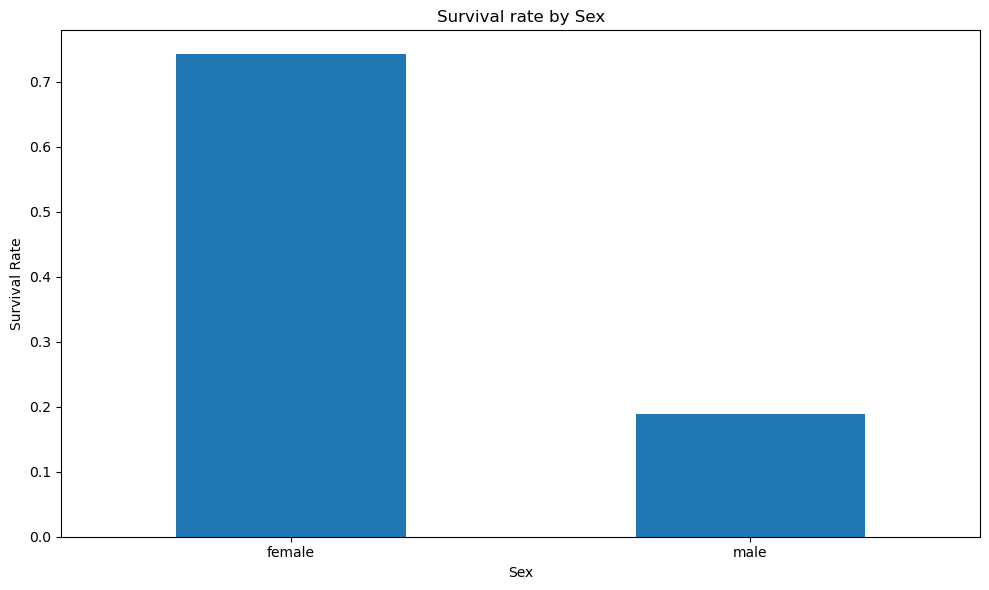

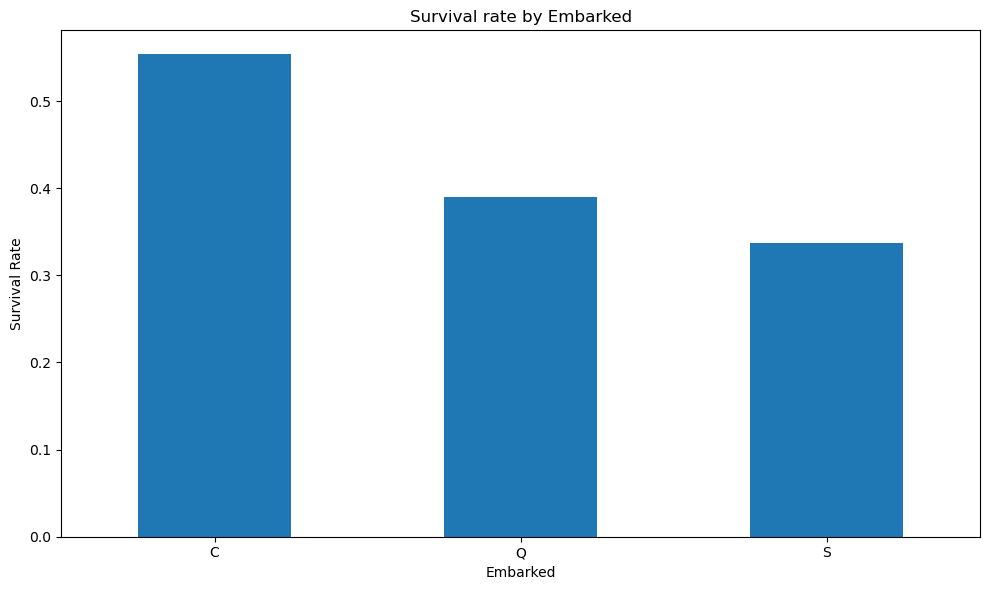

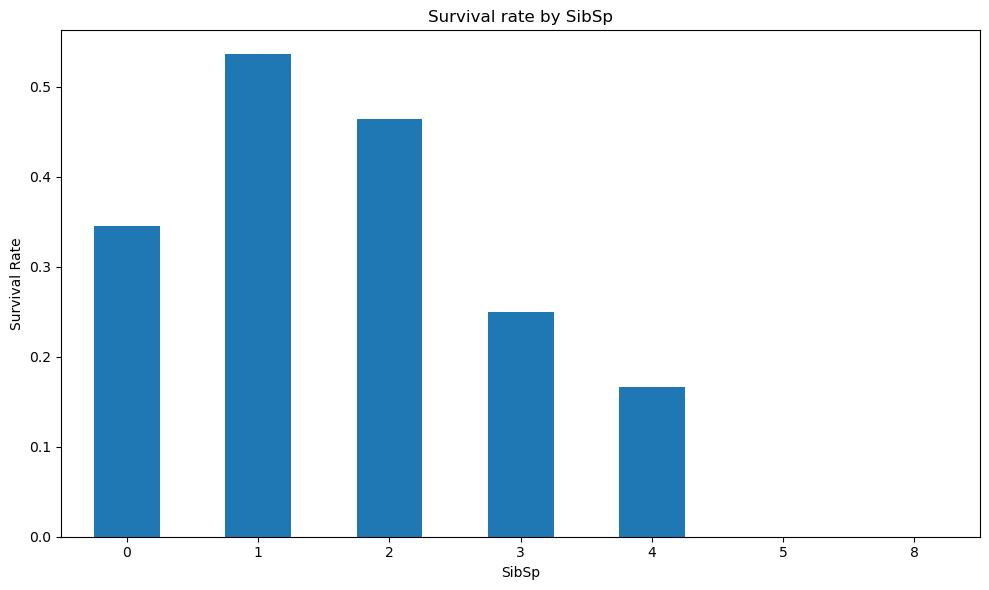

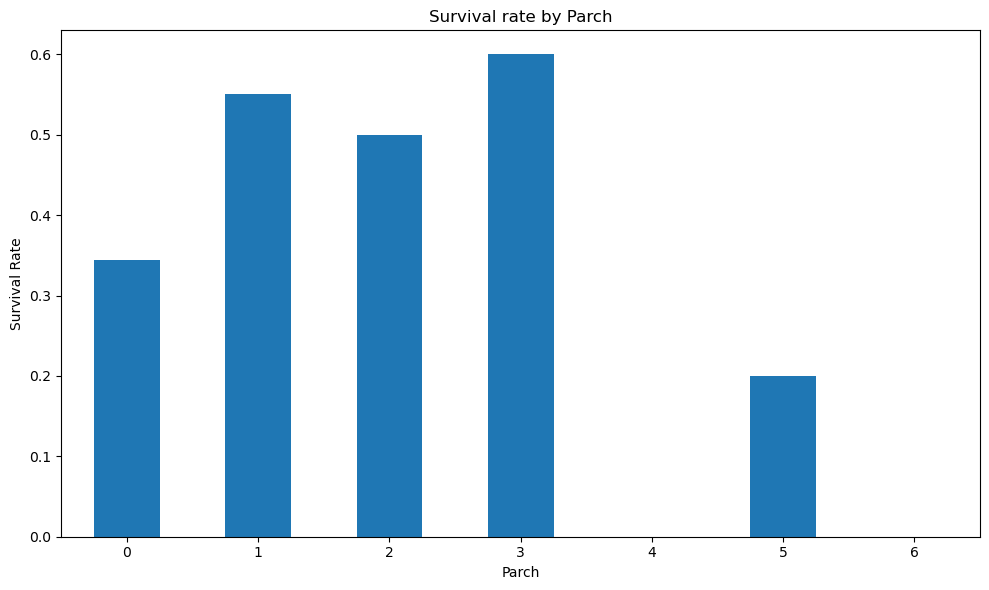

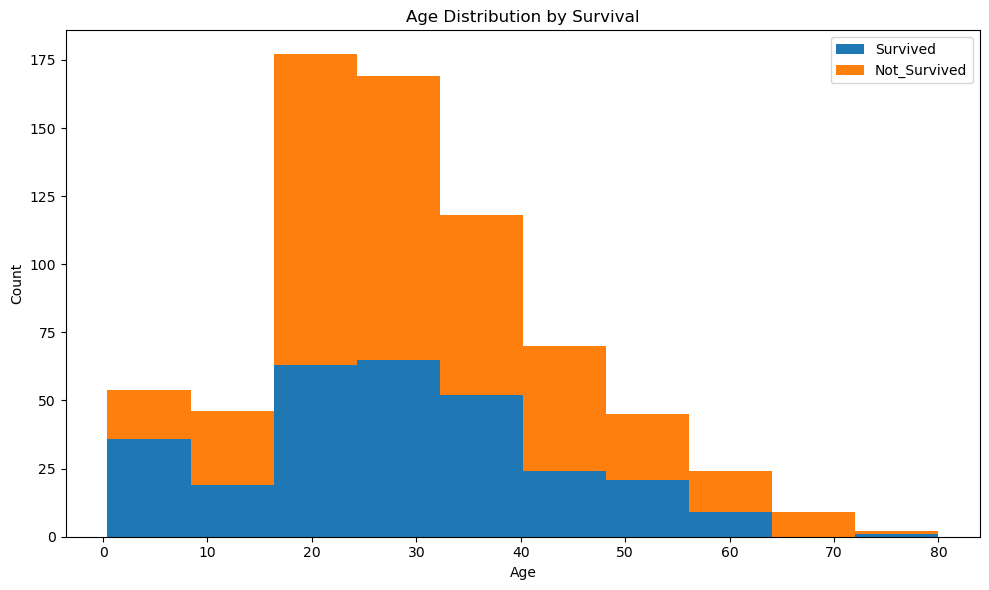

In [37]:
result=TitanicEDA('train.csv')
result.implement()